In [1]:
import numpy as np
import matplotlib.pyplot as plt

This is gonna be a fun one! Lets see how basic and then efficient I can come up with solutions to these images...

In [2]:
def square(size):
    return np.zeros((size, size))
def showIm(shape):
    plt.imshow(shape, interpolation='nearest')
    plt.show()

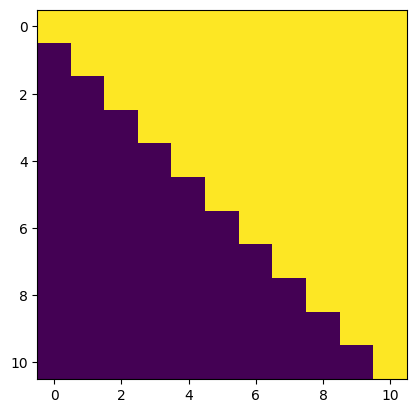

In [3]:

Stairs_upsidedown = square(11)
##Kept getting the yellow and purple swapped, thats why i call them upside down. Also descending? comprable to a glass half full i guess
for i in range(10):
    Stairs_upsidedown[i, i:11] = 1
Stairs_upsidedown[10,10] = 1
showIm(Stairs_upsidedown)

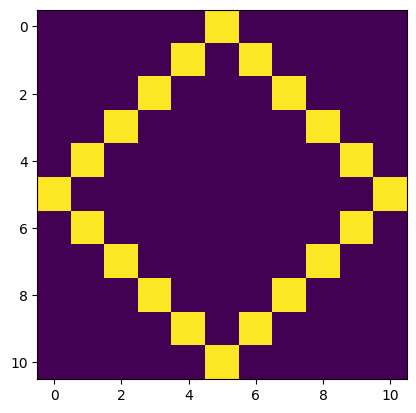

In [4]:
diamond = square(11)
#Dope
for i in range(5):
    diamond[i, 5-i] = 1
    diamond[5+i, i] = 1
    diamond[5-i, 10-i] = 1
    diamond[5+i, 10-i] = 1
diamond[10,5] = 1
showIm(diamond)

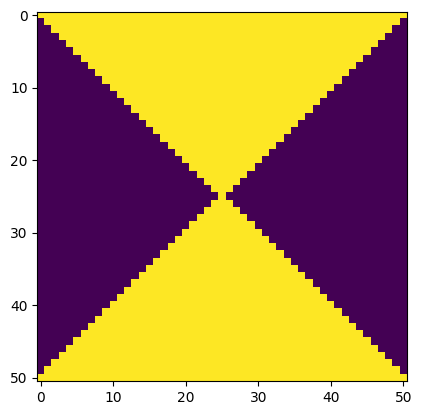

In [5]:
triange_quatre = square(51)
##A couple steps, almost an hourglass, not fine enough unfortunately
for i in range(26):
    triange_quatre[i, i:51-i] = 1
    triange_quatre[50-i, i:51-i] = 1
showIm(triange_quatre)

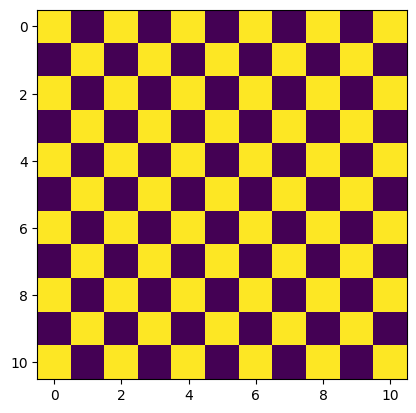

In [6]:
plaid = square(11)
##Classic pattern, quick solution
for i in range(11):
    for j in range(11):
        if i%2 == j%2:
            plaid[i,j] = 1 
showIm(plaid)

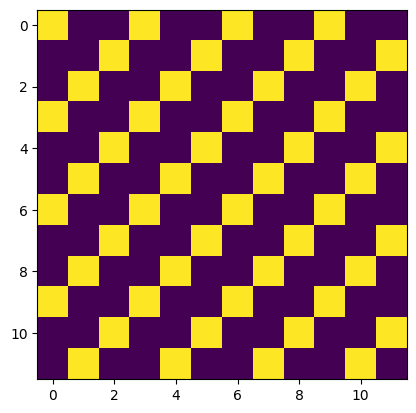

In [7]:
funky_plaid = square(12)
##fun to look at, a little different of a period as the last one
for i in range(12):
    for j in range(12):
        if (i+j)%3 == 0:
            funky_plaid[i, j] = 1
showIm(funky_plaid)

484


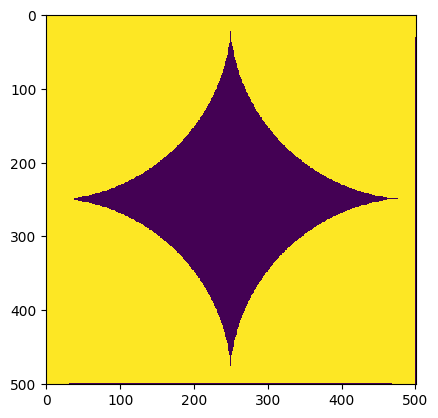

In [8]:
print(22**2)
##This is the painful and ugly way to code this up lol, check next one to see it done more clean
quatre_circle = square(501)
for i in range(250):
    for j in range(250):
        if abs((i**2 + j**2) % 250**2) < 1000:
            quatre_circle[i, 0:j] = 1
            quatre_circle[500 - j, 0:i] = 1
            quatre_circle[0:i, 500 -j] = 1
            quatre_circle[500- i, 500 -j:500] = 1
            quatre_circle[0:500, 0:22] = 1
            quatre_circle[0:23, 0:500] = 1
            quatre_circle[0:500, 477:500] = 1
            quatre_circle[477:500, 0:500] = 1

showIm(quatre_circle)

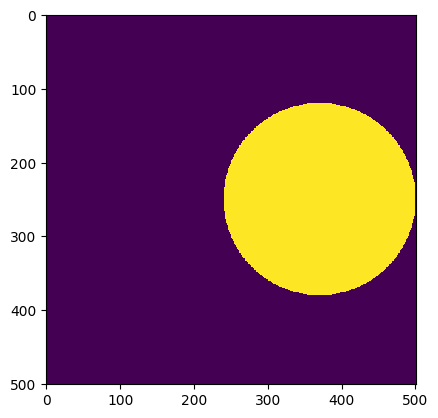

In [9]:
practice = square(501)
##Create two circles, the first will be just a circle, the second will add another circle but remove the intersection using modular arithmetic
def draw_circle(x, y, rad, sqr):
    for i in range(rad):
        for j in range(rad):
            if (i**2 + j**2) <= rad**2:
                sqr[x+i, y+j] = 1
                sqr[x+i, y-j] = 1
                sqr[x-i, y+j] = 1
                sqr[x-i, y-j] = 1
    return sqr
def venn_style(x, y, rad, sqr):
    for i in range(rad):
        for j in range(rad):
            if (i**2 + j**2) <= rad**2:
                sqr[x+i, y+j] += 1
                sqr[x+i, y-j] += 1
                sqr[x-i, y+j] += 1
                sqr[x-i, y-j] += 1
    sqr = sqr%2
    return sqr
showIm(draw_circle(250, 370, 130, practice))

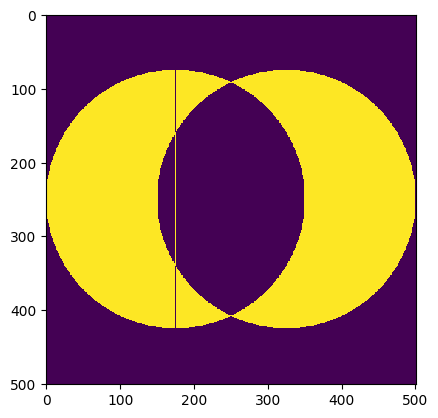

In [10]:
venn = square(501)
venn = draw_circle(250, 325, 175, venn)
venn = venn_style(250, 175, 175, venn)
showIm(venn)


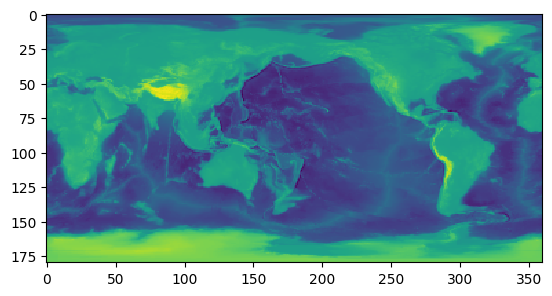

In [11]:
topo = np.loadtxt('topography_180x360_grid.txt')
showIm(topo)


In [12]:
## loops
max_val = topo[0][0]
location_max = np.zeros(2)
location_min = np.zeros(2)
min_val = topo[0][0]
for i in range(topo.shape[0]):
    for j in range(topo.shape[1]):
        to_comp = topo[i][j]
        if to_comp >= max_val:
            max_val = to_comp
            location_max[0] = i
            location_max[1] = j
        if to_comp <= min_val:
            max_val = to_comp
            location_min[0] = i
            location_min[1] = j

max_loc = location_max
print('for loop max value is:', max_val)
print('max location on the grid is:', max_loc)
print('for loop min value is:', min_val)
print('min location on the grid is:', location_min
)


for loop max value is: 4055.0
max location on the grid is: [172.  65.]
for loop min value is: -4298.0
min location on the grid is: [161. 340.]


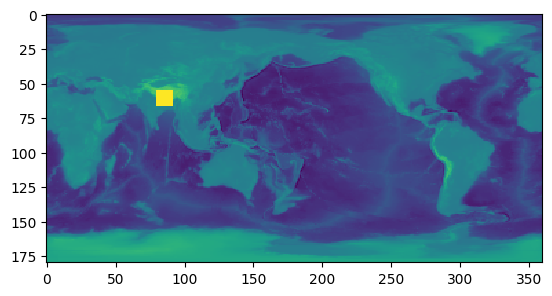

In [13]:
topo_max = topo.copy()
topo_max[55:67, 80:92] = 10000

showIm(topo_max)

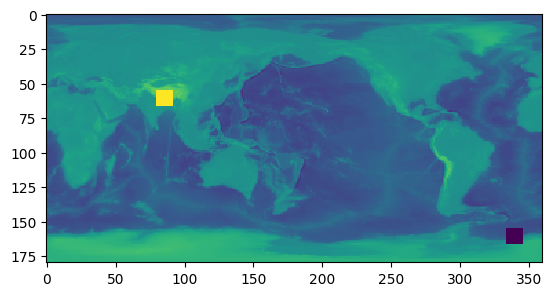

In [14]:
topo_min_max = topo_max.copy()
topo_min_max[155:167, 334:346] = -10000
showIm(topo_min_max)

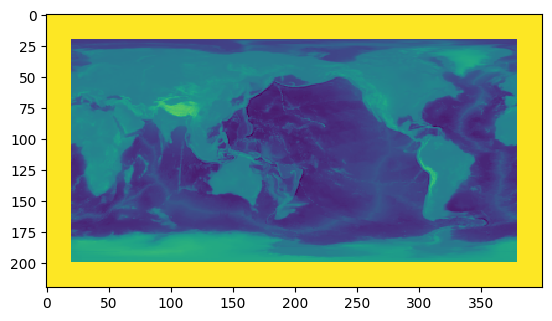

In [15]:
### Frame this guy

top_bottom = 10000*np.ones([20, 360])
sides = 10000*np.ones((220, 20))
bordered = np.append(topo, top_bottom, axis = 0)
bordered = np.append(top_bottom, bordered, axis=0)
bordered = np.append(bordered, sides, axis = 1)
bordered = np.append(sides, bordered, axis=1)
showIm(bordered)
